# Points Scored

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

kickList = ['FG < 20M','20-29M','30-39M','40-49M','50+M'] 

In [2]:
def points(row):
#     kickList = ['FG < 20M','20-29M','30-39M','40-49M','50+M']    
    touchdowns = row[['rush_TD','rec_TD','KR_TD','PR_TD','def_TD']].sum()
    xpm = row['XPM']
    fgm = row[kickList].sum()
    return touchdowns*6 + xpm + fgm*3

def getPointsS(S):
    rushDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/rushStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    recDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/recStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    specDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/specStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    defDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/defStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()
    kickDF = pd.concat([pd.read_csv('Boxscores/S%s/%s/kickStats.csv'%(S,p)) for p in next(os.walk('Boxscores/S%s/'%S))[1] if p[0] != '.']).groupby(['Player','Team']).sum()

#     kickList = ['FG < 20','20-29','30-39','40-49','50+']
#     for k in kickList:
#         kickDF[k] = [int(x.strip('[]').split(',')[0]) for x in kickDF[k]]
#     print(kickDF.columns)
#     kickDF = kickDF.groupby(['Player','Team']).sum()

    sDF = pd.concat([rushDF,recDF,specDF,defDF,kickDF])

    sDF = sDF[['S','W','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FG < 20M','20-29M','30-39M','40-49M','50+M']].fillna(0)

    sDF['S'] = str(S)

    sDF['Points'] = sDF.apply(lambda x : points(x), axis = 1)
    
    sDF.to_csv('Points/%s.csv'%S)
    
    return

In [3]:
curSeason = 25

for i in range(1,curSeason+1):
    print(i)
    getPointsS(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25


In [4]:
allPoints = pd.concat([pd.read_csv('Points/%s'%p) for p in next(os.walk('Points'))[2] if '.csv' in p]).fillna(0)
allPoints['Player'] = allPoints['Player'].str.replace(r" \(.*?\)","").str.replace(r"\(.*?\) ","").str.replace(r"\(.*?\)","")
allPoints['Team'] = allPoints['Team'].str.replace('ARI','AZ')
allPoints['FGM'] = allPoints['FG < 20M'] + allPoints['20-29M'] + allPoints["30-39M"] + allPoints["40-49M"] + allPoints["50+M"]
allPoints = allPoints.drop(columns=kickList)
allPoints = allPoints[['Player','S','Team','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']]
allPoints.to_csv('AllPoints.csv')

In [5]:
allPointsRank = allPoints.groupby(['Player']).sum().sort_values('Points',ascending=False)
allPointsRank['Rank'] = allPointsRank['Points'].rank(method='min',ascending=False)
# allPointsRank = allPointsRank.drop(columns=['S'])
allPointsRank.to_csv('PointsRanking.csv')

## All Time

In [6]:
allPointsRank.head(10)

,S,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM,Rank
Player,,,,,,,,,,
"Turkleton, T.",78,1342.0,0.0,0.0,0.0,0.0,0.0,496.0,282.0,1.0
"Dasistwirklichseinnachname, A.",220,1236.0,0.0,0.0,0.0,0.0,0.0,411.0,275.0,2.0
"Fulture, K.",176,1122.0,0.0,0.0,0.0,0.0,0.0,378.0,248.0,3.0
"Jackson, D.",135,1114.0,0.0,0.0,0.0,0.0,0.0,388.0,242.0,4.0
"Crisco, A.",195,1024.0,0.0,0.0,0.0,0.0,0.0,325.0,233.0,5.0
"Forfeit, N.",90,1001.0,0.0,0.0,0.0,0.0,0.0,365.0,212.0,6.0
"Donaldson, N.",144,994.0,0.0,0.0,0.0,0.0,0.0,334.0,220.0,7.0
"Taylor, O.",256,876.0,123.0,23.0,0.0,0.0,0.0,0.0,0.0,8.0
"Blewitt, I.",44,872.0,0.0,0.0,0.0,0.0,0.0,266.0,202.0,9.0


In [7]:
from tabulate import tabulate
tableCols = ['Rank','Player','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']
tableHeaders = ['Rank','Player','Points','Rushing TDs','Receiving TDs','Kick Return TDs','Punt Return TDs','Defensive TDs','Extra Points','Field Goals']
tableHeadShort = ['Rank','Player','Points','Rush TD','Rec TD','KR TD','PR TD','Def TD','XP','FG']

In [8]:
# print(tabulate(allPointsRank.reset_index().head(50)[tableCols],headers=tableHeaders,tablefmt='mediawiki',showindex=False))

In [9]:
# print(tabulate(allPointsRank.reset_index().head(25)[['Rank','Player','Points']],headers=tableHeadShort,tablefmt='simple',showindex=False))

In [10]:
allPointsRank.reset_index()[['Rank','Player','Points']].head(25)

,Rank,Player,Points
0,1.0,"Turkleton, T.",1342.0
1,2.0,"Dasistwirklichseinnachname, A.",1236.0
2,3.0,"Fulture, K.",1122.0
3,4.0,"Jackson, D.",1114.0
4,5.0,"Crisco, A.",1024.0
5,6.0,"Forfeit, N.",1001.0
6,7.0,"Donaldson, N.",994.0
7,8.0,"Taylor, O.",876.0
8,9.0,"Blewitt, I.",872.0
9,10.0,"Madlad, B.",834.0


(0, 100)

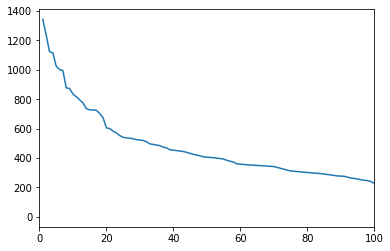

In [11]:
plt.plot(allPointsRank['Rank'],allPointsRank['Points'])
plt.xlim(0,100)

## By Team

In [12]:
# Wiki

teamList = ['AZ','AUS','BAL','BER','CHI','COL','HON','LV','NO','NY','OCO','PHI','SAR','SJS','YKW']
teamName = ['Arizona Outlaws','Austin Copperheads','Baltimore Hawks','Berlin Fire Salamanders',
            'Chicago Butchers','Colorado Yeti','Honolulu Hahalua','Las Vegas Legion',
            'New Orleans Second Line', "New York Silverbacks", 'Orange County Otters',
            'Philadelphia Liberty', 'Sarasota Sailfish','San Jose Sabercats','Yellowknife Wraiths']

In [14]:
teamPoints = allPoints.groupby(['Team','Player']).sum().loc['COL'].sort_values('Points',ascending=False)
teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
teamPoints.reset_index().head(20)[tableCols]

,Rank,Player,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
0,1.0,"McCormick, M.",524.0,12.0,0.0,0.0,0.0,0.0,134.0,106.0
1,2.0,"Banana, S.",519.0,0.0,0.0,0.0,0.0,0.0,174.0,115.0
2,3.0,"Bishop, J.",450.0,0.0,72.0,3.0,0.0,0.0,0.0,0.0
3,4.0,"Owens, A.",366.0,39.0,20.0,1.0,1.0,0.0,0.0,0.0
4,5.0,"Miller, H.",336.0,0.0,50.0,4.0,1.0,1.0,0.0,0.0
5,6.0,"Leg, P.",302.0,0.0,0.0,0.0,0.0,0.0,98.0,68.0
6,7.0,"Grau, M.",300.0,26.0,23.0,1.0,0.0,0.0,0.0,0.0
7,8.0,"Kicksit, B.",293.0,0.0,0.0,0.0,0.0,0.0,86.0,69.0
8,9.0,"Cansino, D.",228.0,32.0,6.0,0.0,0.0,0.0,0.0,0.0
9,10.0,"Corbett, K.",213.0,0.0,0.0,0.0,0.0,0.0,84.0,43.0


In [18]:
teamPoints2 = allPoints.groupby(['Team','Player','S']).sum().loc['COL'].sort_values('Points',ascending=False)
teamPoints2['Rank'] = teamPoints2['Points'].rank(method='min',ascending=False)
teamPoints2.reset_index().head(20)

,Player,S,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM,Rank
0,"Banana, S.",23,132.0,0.0,0.0,0.0,0.0,0.0,36.0,32.0,1.0
1,"Banana, S.",24,129.0,0.0,0.0,0.0,0.0,0.0,51.0,26.0,2.0
2,"Leg, P.",11,120.0,0.0,0.0,0.0,0.0,0.0,45.0,25.0,3.0
3,"McCormick, M.",10,119.0,0.0,0.0,0.0,0.0,0.0,44.0,25.0,4.0
4,"Corbett, K.",14,116.0,0.0,0.0,0.0,0.0,0.0,35.0,27.0,5.0
5,"McCormick, M.",8,106.0,0.0,0.0,0.0,0.0,0.0,22.0,28.0,6.0
6,"Banana, S.",22,105.0,0.0,0.0,0.0,0.0,0.0,30.0,25.0,7.0
7,"Leg, P.",12,104.0,0.0,0.0,0.0,0.0,0.0,38.0,22.0,8.0
8,"Jackson, J.",20,99.0,0.0,0.0,0.0,0.0,0.0,33.0,22.0,9.0
9,"Banana, S.",21,99.0,0.0,0.0,0.0,0.0,0.0,36.0,21.0,9.0


In [45]:
# for t in teamList:
#     teamPoints = allPoints.groupby(['Team','Player']).sum().loc[t].sort_values('Points',ascending=False)
#     teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
#     print('\n=== %s ===\n'%teamName[teamList.index(t)])
#     print(tabulate(teamPoints.reset_index().head(10)[tableCols],headers=tableHeaders,tablefmt='mediawiki',showindex=False))

In [47]:
# for t in teamList:
#     teamPoints = allPoints.groupby(['Team','Player']).sum().loc[t].sort_values('Points',ascending=False)
#     teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
#     print('\n=== %s ===\n'%teamName[teamList.index(t)])
#     print(tabulate(teamPoints.reset_index().head(10)[['Rank','Player','Points']],headers=tableHeadShort,tablefmt='simple',showindex=False))

## By Season

In [49]:
# for t in range(25,26):
#     teamPoints = allPoints.groupby(['S','Player']).sum().loc[str(t)].sort_values('Points',ascending=False)
#     teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
#     print('\n=== Season %s ===\n'%t)
#     print(tabulate(teamPoints.reset_index().head(10)[tableCols],
#                    headers=tableHeaders,
#                    tablefmt='mediawiki',showindex=False))

In [53]:
teamPoints = allPoints.groupby(['S','Player']).sum().loc[25].sort_values('Points',ascending=False)
teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
teamPoints.reset_index().head(10)[tableCols]

,Rank,Player,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
0,1.0,"Powers, V.",73.0,0.0,0.0,0.0,0.0,0.0,19.0,18.0
1,2.0,"Jay-Jaymison, J.",63.0,0.0,0.0,0.0,0.0,0.0,15.0,16.0
2,3.0,"Fencik, J.",52.0,0.0,0.0,0.0,0.0,0.0,16.0,12.0
3,4.0,"PhastBawls, D.",50.0,0.0,0.0,0.0,0.0,0.0,11.0,13.0
4,5.0,"Small, J.",48.0,0.0,0.0,0.0,0.0,0.0,9.0,13.0
5,6.0,"Thomason, J.",45.0,0.0,0.0,0.0,0.0,0.0,15.0,10.0
6,6.0,"Banana, S.",45.0,0.0,0.0,0.0,0.0,0.0,18.0,9.0
7,8.0,"Kokot, B.",43.0,0.0,0.0,0.0,0.0,0.0,16.0,9.0
8,9.0,"Watts, Z.",42.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9.0,"Gilbert, R.",42.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
# for t in range(25,26):
#     teamPoints = allPoints.groupby(['S','Player']).sum().loc[str(t)].sort_values('Points',ascending=False)
#     teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)
#     print('\n=== Season %s ===\n'%t)
#     print(tabulate(teamPoints.reset_index().head(10)[tableCols],
#                    headers=tableHeadShort,
#                    tablefmt='psql',showindex=False))

In [74]:
teamPoints = allPoints.groupby(['Player','S']).sum().sort_values('Points',ascending=False)
teamPoints['Rank'] = teamPoints['Points'].rank(method='min',ascending=False)

In [75]:
print(tabulate(teamPoints.reset_index().head(10)[['Rank','S','Player','Points','rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']],
                   headers=['Rank','S','Player','Points','Rushing TDs','Receiving TDs','Kick Return TDs','Punt Return TDs','Defensive TDs','Extra Points','Field Goals'],
                   tablefmt='mediawiki',showindex=False))

{| class="wikitable" style="text-align: left;"
|+ <!-- caption -->
|-
! align="right"|   Rank !! align="right"|   S !! Player        !! align="right"|   Points !! align="right"|   Rushing TDs !! align="right"|   Receiving TDs !! align="right"|   Kick Return TDs !! align="right"|   Punt Return TDs !! align="right"|   Defensive TDs !! align="right"|   Extra Points !! align="right"|   Field Goals
|-
| align="right"|      1 || align="right"|   9 || Smallwood, D. || align="right"|      180 || align="right"|            27 || align="right"|               3 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align="right"|              0 || align="right"|             0
|-
| align="right"|      2 || align="right"|   7 || Harris, S.    || align="right"|      166 || align="right"|             0 || align="right"|               0 || align="right"|                 0 || align="right"|                 0 || align="right"|               0 || align

In [92]:
print(tabulate(teamPoints.reset_index().head(10)[['Rank','S','Player','Points']],
#                                                   ,'rush_TD','rec_TD','KR_TD','PR_TD','def_TD','XPM','FGM']],
                   headers=['Rank','S','Player','Points','Rush TD','Rec TD','KR TD','PR TD','Def TD','XP','FG'],
                   tablefmt='simple',showindex=False))

  Rank    S  Player           Points
------  ---  -------------  --------
     1    9  Smallwood, D.       180
     2    7  Harris, S.          166
     3   10  Taylor, O.          162
     4    3  Ronaldo, C.         159
     5    9  Blewitt, I.         158
     6    6  Harris, S.          152
     7   10  Leg, P.             145
     8    9  Taylor, O.          144
     8   10  Turkleton, T.       144
    10   24  Crisco, A.          143


## By Player

In [43]:
allPoints.groupby(['Player','Team']).sum().loc['Fulture, K.'].sort_values('Points',ascending=False).head(10)

,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
Team,,,,,,,,
PHI,526.0,0.0,0.0,0.0,0.0,0.0,196.0,110.0
CHI,517.0,0.0,0.0,0.0,0.0,0.0,148.0,123.0
BAL,79.0,0.0,0.0,0.0,0.0,0.0,34.0,15.0


In [44]:
allPoints.groupby(['Player','S','Team']).sum().loc['Owens, A.'].sort_values('Points',ascending=False).head(10)

,,Points,rush_TD,rec_TD,KR_TD,PR_TD,def_TD,XPM,FGM
S,Team,,,,,,,,
19,COL,84.0,9.0,5.0,0.0,0.0,0.0,0.0,0.0
22,COL,60.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
24,COL,60.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0
18,AUS,54.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
20,COL,54.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
21,COL,54.0,4.0,4.0,0.0,1.0,0.0,0.0,0.0
23,COL,54.0,7.0,2.0,0.0,0.0,0.0,0.0,0.0
17,AUS,42.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0
25,NY,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [88]:
allPoints.groupby(['Player','Team','S']).sum().loc['Dasistwirklichseinnachname, A.'].sort_values('S',ascending=False).tail(10).mean()

Points     118.8
rush_TD      0.0
rec_TD       0.0
KR_TD        0.0
PR_TD        0.0
def_TD       0.0
XPM         38.4
FGM         26.8
dtype: float64